In [3]:
'''
Исходный код к уроку 1.
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

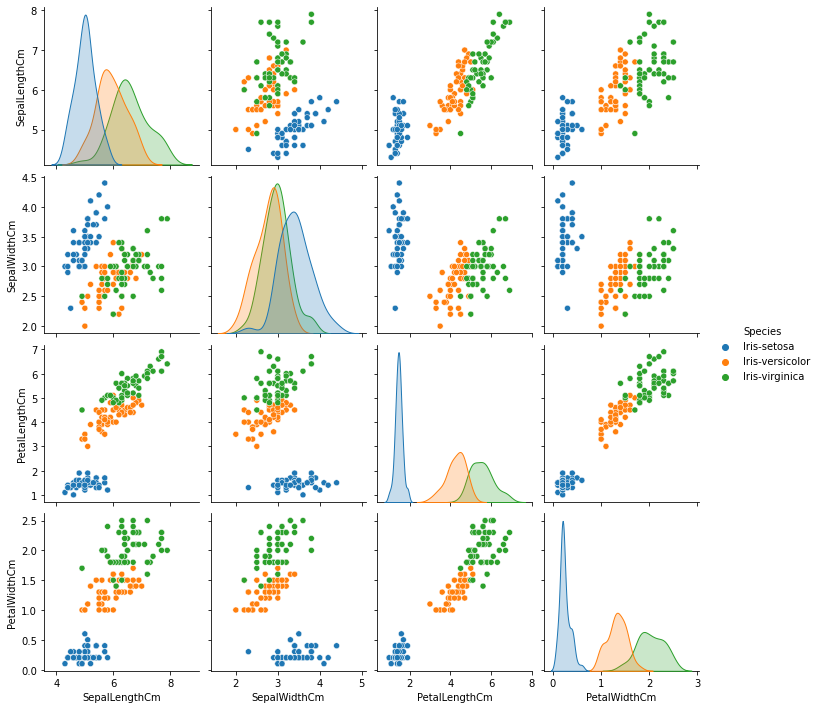

In [13]:
### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("./neural-networks-intro/Iris.csv")
# print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
# plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
#x = normalize(x.as_matrix())
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
#y = y.as_matrix()
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [15]:
# вычисление сигмоид функции
def sigmoid(x):
     return 1 / (1 + np.exp(-x))

# вычисление производной от сигмоид функции
def sigm_deriv(x):
        return x * (1 - x)

In [20]:
# вычисление Relu функции
def ReLU(x):
         return x  *  (x  >  0)
# вычисление производной от Relu функции
def relu_deriv(x):
    return x>0

In [56]:
import time
### Шаг 3. Обученние нейронной сети
def fit_nn(neuron_numb=5, learning_rate=0.1, n_epochs=3000, act_fun=sigmoid, act_fun_deriv=sigm_deriv):
    time1 = time.time()

    # присваевание случайных весов
    w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
    w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

    # массив для ошибок, чтобы потом построить график
    errors = []
    test_errors = []
    
    # процесс обучения
    for i in range(n_epochs):
    
        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = act_fun(np.dot(layer0, w0))
        layer2 = act_fun(np.dot(layer1, w1))
    
        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
        layer2_delta = layer2_error * act_fun_deriv(layer2)
        
        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * act_fun_deriv(layer1)
        
        w1 += layer1.T.dot(layer2_delta) * learning_rate
        w0 += layer0.T.dot(layer1_delta) * learning_rate
        # метрика модели
        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        accuracy = (1 - error) * 100

        test_layer0 = X_test
        test_layer1 = sigmoid(np.dot(test_layer0, w0))
        test_layer2 = sigmoid(np.dot(test_layer1, w1))

        test_layer2_error = y_test - test_layer2
        test_error = np.mean(np.abs(test_layer2_error))
        test_errors.append(test_error)
        test_accuracy = (1 - test_error) * 100

    time2 = time.time()
    
    return errors, accuracy, test_errors, test_accuracy, (time2-time1)*1000.0

errors, accuracy, test_errors, test_accuracy, ex_time = fit_nn()
print(ex_time)

465.82579612731934


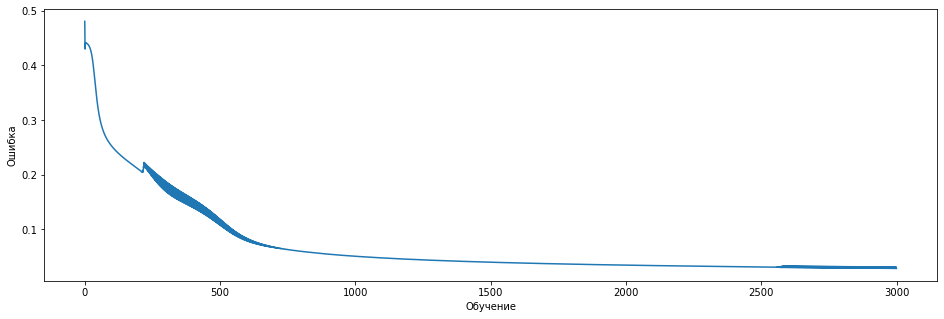

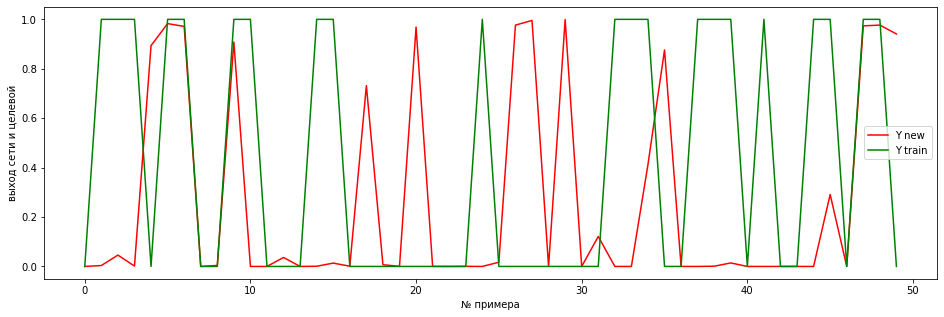

Аккуратность нейронной сети 97.14%


In [17]:
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 

N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2[:N,1], 'r',label = 'Y new')
plt.plot(y_train[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")

In [58]:
n_epochs = [100, 1000, 3000, 5000]
learning_rates = [0.01, 0.1, 1]
n_neurons = [2, 4, 6, 8, 10, 30]
act_funs = [{'name': 'sigmoid', 'fun': sigmoid, 'deriv': sigm_deriv}, {'name': 'ReLU', 'fun': ReLU, 'deriv': relu_deriv}]

In [59]:
results = []
for epochs in n_epochs:
    for learning_rate in learning_rates:
        for neuron_numb in n_neurons:
            for act_fun in act_funs:
                errors, accuracy, test_errors, test_accuracy, ex_time = fit_nn(neuron_numb=neuron_numb, learning_rate=learning_rate, n_epochs=epochs, act_fun=act_fun['fun'], act_fun_deriv=act_fun['deriv'])
                result = {'neuron_numb': neuron_numb, 'learning_rate': learning_rate, 'epochs': epochs, 'act_fun': act_fun['name'], 'ex_time': ex_time, 'accuracy': accuracy, 'test_accuracy': test_accuracy}
                results.append(result)

/home/alex/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [60]:
results.sort(key=lambda val: val['test_accuracy'], reverse=True)

In [61]:
for res in results[:100]:
    print(res)

{'neuron_numb': 10, 'learning_rate': 1, 'epochs': 3000, 'act_fun': 'sigmoid', 'ex_time': 550.5940914154053, 'accuracy': 97.8842288962187, 'test_accuracy': 96.52134706123977}
{'neuron_numb': 6, 'learning_rate': 1, 'epochs': 5000, 'act_fun': 'sigmoid', 'ex_time': 824.6588706970215, 'accuracy': 97.81719936875116, 'test_accuracy': 96.49793423477665}
{'neuron_numb': 6, 'learning_rate': 1, 'epochs': 3000, 'act_fun': 'sigmoid', 'ex_time': 494.29917335510254, 'accuracy': 97.8714276501773, 'test_accuracy': 96.28626247288943}
{'neuron_numb': 4, 'learning_rate': 1, 'epochs': 1000, 'act_fun': 'sigmoid', 'ex_time': 147.7956771850586, 'accuracy': 95.3149056645784, 'test_accuracy': 96.16840756261139}
{'neuron_numb': 30, 'learning_rate': 0.1, 'epochs': 5000, 'act_fun': 'sigmoid', 'ex_time': 1481.4679622650146, 'accuracy': 97.43786219576393, 'test_accuracy': 96.15836298024394}
{'neuron_numb': 8, 'learning_rate': 0.1, 'epochs': 5000, 'act_fun': 'sigmoid', 'ex_time': 863.3911609649658, 'accuracy': 97.425

Лучший результата показала следующая комбинация параметров:
{'neuron_numb': 10, 'learning_rate': 1, 'epochs': 3000, 'act_fun': 'sigmoid', 'ex_time': 550.5940914154053, 'accuracy': 97.8842288962187, 'test_accuracy': 96.52134706123977}

По приведенному списку видно, что само по себе увеличение или уменьшенее какого-то параметра не дает безусловного выигрыша по точности (разве только увеличение learning_rate, но вданном случае, я думаю, это специфика задачи, в целом с ним нужно быть осторожнее). Например простое увеличение числа нейронов не всегда оптимально. 

В целом, я думаю, можно сказать, что функция активация в виде сигмоида для данной задачи лучше, чем ReLU, а увеличение числа итераций положительно сказывается на точности (что ожидаемо)